# India Air Quality Dataset 

### Importing Libraries and Dataset

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_predict

import warnings
warnings.filterwarnings('ignore')

In [189]:
#data=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\station_hour.csv")
data=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\station_day.csv")
#data=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\city_day.csv")

In [190]:
data.shape

(108035, 16)

In [191]:
station=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\stations.csv")

In [192]:
station.shape

(230, 5)

In [193]:
df=pd.merge(data,station,on="StationId")
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [194]:
df.tail()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
108030,WB013,2020-06-27,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0,Good,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active
108031,WB013,2020-06-28,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active
108032,WB013,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active
108033,WB013,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active
108034,WB013,2020-07-01,10.50,36.50,7.78,22.50,30.25,27.23,0.58,2.80,13.10,1.31,7.39,NaN,59.0,Satisfactory,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108035 entries, 0 to 108034
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StationId    108035 non-null  object 
 1   Date         108035 non-null  object 
 2   PM2.5        86410 non-null   float64
 3   PM10         65329 non-null   float64
 4   NO           90929 non-null   float64
 5   NO2          91488 non-null   float64
 6   NOx          92535 non-null   float64
 7   NH3          59930 non-null   float64
 8   CO           95037 non-null   float64
 9   SO2          82831 non-null   float64
 10  O3           82467 non-null   float64
 11  Benzene      76580 non-null   float64
 12  Toluene      69333 non-null   float64
 13  Xylene       22898 non-null   float64
 14  AQI          87025 non-null   float64
 15  AQI_Bucket   87025 non-null   object 
 16  StationName  108035 non-null  object 
 17  City         108035 non-null  object 
 18  State        108035 non-

In [196]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,86410.000000,65329.000000,90929.000000,91488.000000,92535.000000,59930.000000,95037.000000,82831.000000,82467.000000,76580.000000,69333.000000,22898.000000,87025.000000
mean,80.272571,157.968427,23.123424,35.240760,41.195055,28.732875,1.605749,12.257634,38.134836,3.358029,15.345394,2.423446,179.749290
std,76.526403,123.418672,34.491019,29.510827,45.145976,24.897797,4.369578,12.984723,39.128004,11.156234,29.348587,6.472409,131.324339
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,31.880000,70.150000,4.840000,15.090000,13.970000,11.900000,0.530000,5.040000,18.895000,0.160000,0.690000,0.000000,86.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,132.000000
75%,99.920000,208.670000,24.980000,46.930000,50.500000,38.137500,1.450000,14.920000,47.140000,3.610000,17.510000,2.110000,254.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


In [197]:
df.shape

(108035, 20)

In [198]:
df.isnull().sum()

StationId          0
Date               0
PM2.5          21625
PM10           42706
NO             17106
NO2            16547
NOx            15500
NH3            48105
CO             12998
SO2            25204
O3             25568
Benzene        31455
Toluene        38702
Xylene         85137
AQI            21010
AQI_Bucket     21010
StationName        0
City               0
State              0
Status           324
dtype: int64

<Axes: >

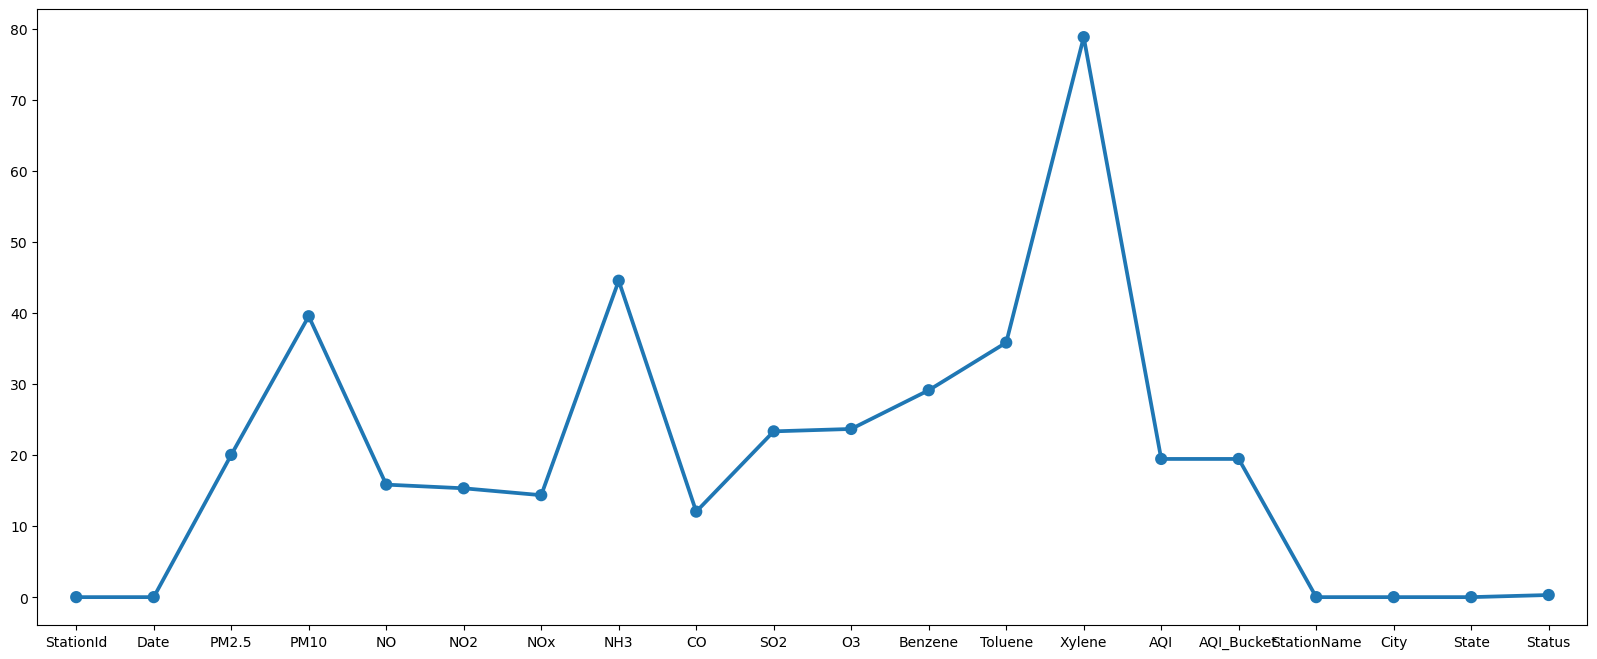

In [199]:
l1=[]
for i in df:
    l1.append(((df[str(i)].isnull().sum())/df.shape[0])*100)
l2=df.columns
plt.figure(figsize=(20,8))
sns.pointplot(x=l2,y=l1)

In [200]:
null_value_percent=pd.DataFrame(l1,index=l2)
null_value_percent

,0
StationId,0.000000
Date,0.000000
PM2.5,20.016661
PM10,39.529782
NO,15.833758
NO2,15.316333
NOx,14.347202
NH3,44.527237
CO,12.031286
SO2,23.329477


In [201]:
df.drop(["Benzene","Toluene","Xylene"],axis=1,inplace=True)

In [202]:
df["StationId"].nunique()

110

In [203]:
# Station id wise empty
df_n=df.select_dtypes(exclude="object")
df_n["StationId"]=df["StationId"]
col=list(df_n.columns)
col.pop()
l5=[]
for i in col:
    l5.append(df.groupby(["StationId"])[i].mean().isnull().sum())
print(pd.DataFrame(l5,index=col))

        0
PM2.5   3
PM10   18
NO      1
NO2     0
NOx     3
NH3    27
CO      1
SO2     9
O3      7
AQI     1


In [204]:
df["City"].nunique()

26

In [205]:
# City wise empty
df_n=df.select_dtypes(exclude=['object'])
df_n["City"]=df["City"]
col = list(df_n.columns)
col.pop()
l3=[]
for i in col:
    l3.append((df.groupby(["City"])[str(i)].mean().isnull().sum()))

null_val=pd.DataFrame(l3,index=col)
print(null_val)

       0
PM2.5  0
PM10   1
NO     0
NO2    0
NOx    1
NH3    1
CO     0
SO2    0
O3     1
AQI    0


In [206]:
df.isnull().sum()

StationId          0
Date               0
PM2.5          21625
PM10           42706
NO             17106
NO2            16547
NOx            15500
NH3            48105
CO             12998
SO2            25204
O3             25568
AQI            21010
AQI_Bucket     21010
StationName        0
City               0
State              0
Status           324
dtype: int64

In [207]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [208]:
df["Date"]=pd.to_datetime(data["Date"])

In [209]:
df.index = df["Date"]

In [210]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,StationName,City,State,Status
Date,,,,,,,,,,,,,,,,,
2017-11-24,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2017-11-25,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2017-11-26,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2017-11-27,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2017-11-28,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [211]:
df.shape

(108035, 17)

In [212]:
df.Date.nunique()

2009

In [213]:
df["City"].nunique()

26

In [214]:
grouped_df=df.groupby('StationId')

In [215]:
df_filled=grouped_df.transform(lambda x :x.fillna(x.mean()))

In [216]:
df_filled

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,,
2017-11-24,2017-11-24,71.36,115.75,1.7500,20.650000,12.40000,12.190000,0.10,10.76,109.26,95.299643
2017-11-25,2017-11-25,81.40,124.50,1.4400,20.500000,12.08000,10.720000,0.12,15.24,127.09,184.000000
2017-11-26,2017-11-26,78.32,129.06,1.2600,26.000000,14.85000,10.280000,0.14,26.96,117.44,197.000000
2017-11-27,2017-11-27,88.76,135.32,6.6000,30.850000,21.77000,12.910000,0.11,33.59,111.81,198.000000
2017-11-28,2017-11-28,64.18,104.09,2.5600,28.070000,17.01000,11.420000,0.09,19.00,138.18,188.000000
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,2020-06-27,8.65,16.46,34.5188,46.482771,73.57645,19.750275,0.69,4.36,30.59,50.000000
2020-06-28,2020-06-28,11.80,18.47,34.5188,46.482771,73.57645,19.750275,0.68,3.49,38.95,65.000000
2020-06-29,2020-06-29,18.60,32.26,13.6500,200.870000,214.20000,11.400000,0.78,5.12,38.17,63.000000


In [217]:
df_filled.isnull().sum()

Date         0
PM2.5     4948
PM10     30172
NO         738
NO2          0
NOx       3460
NH3      39604
CO        1553
SO2       9128
O3       10594
AQI       1553
dtype: int64

In [218]:
groupedcity_df=df.groupby("City")

In [219]:
df_filled=groupedcity_df.transform(lambda x:x.fillna(x.mean()))

In [220]:
df_filled.isnull().sum()

Date        0
PM2.5       0
PM10     6099
NO          0
NO2         0
NOx      1169
NH3      2009
CO          0
SO2         0
O3        162
AQI         0
dtype: int64

In [221]:
df_temp=df.select_dtypes(include="float64")
num_col=df_temp.columns

for i in num_col:
    pm_mean=df_filled[i].mean()
    df_filled[i]=df_filled[i].fillna(pm_mean)

In [222]:
df_filled.shape

(108035, 11)

In [223]:
df_filled.isnull().sum()

Date     0
PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [224]:
def outlier_removal(data,k=1):
    mean_value=data.mean()
    data=data.to_list()
    
    q3=np.percentile(data,75)
    q1=np.percentile(data,25)

    iqr=q3-q1

    lower_range=q1-(iqr*1.5)
    higher_range=q3+(iqr*1.5)
    
    
    for i,j in enumerate(data):
        if (j<=lower_range or j>=higher_range):
            data[i]=mean_value
    return data

In [225]:
for j in range(0,9):
    for i in num_col:
        df_filled[i]=outlier_removal(df_filled[i])

In [226]:
num_col

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

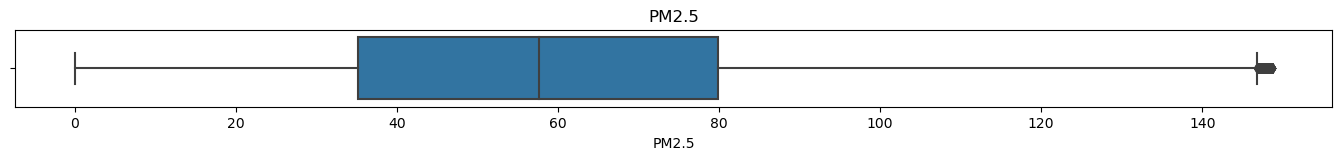

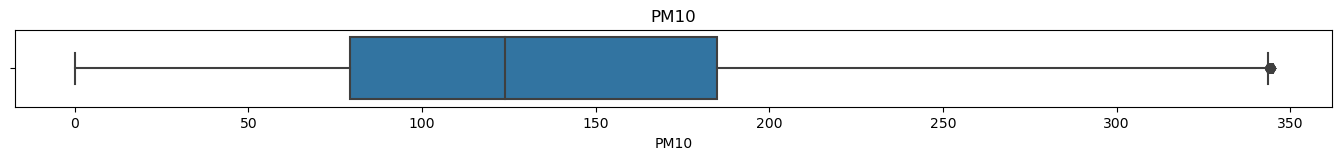

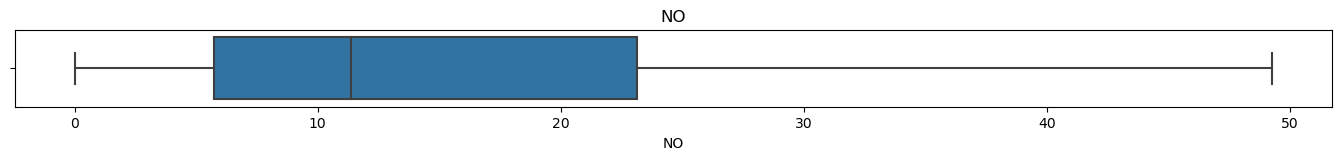

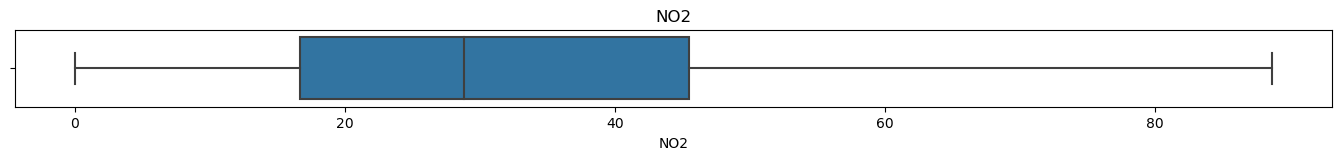

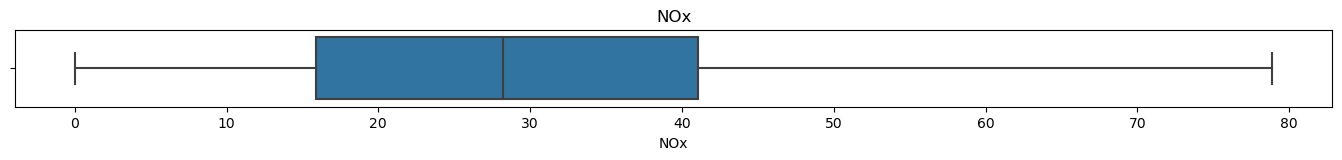

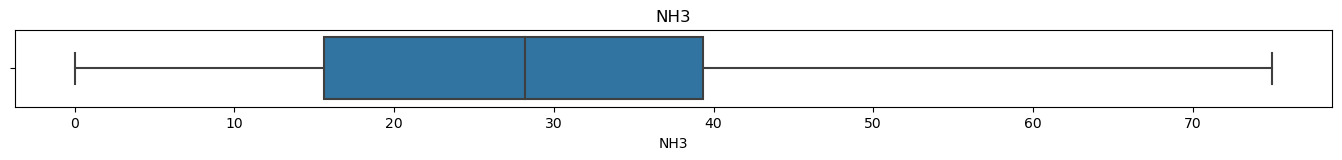

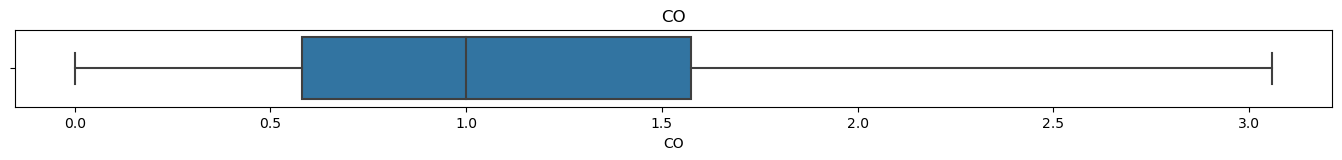

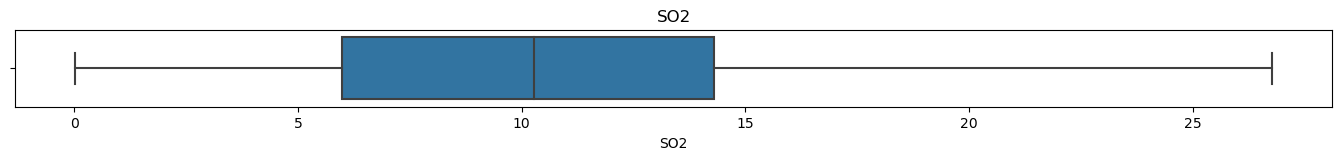

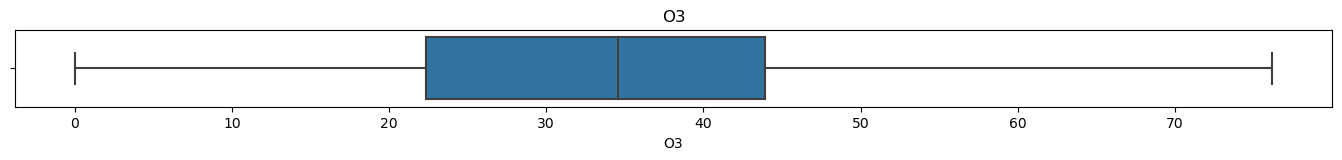

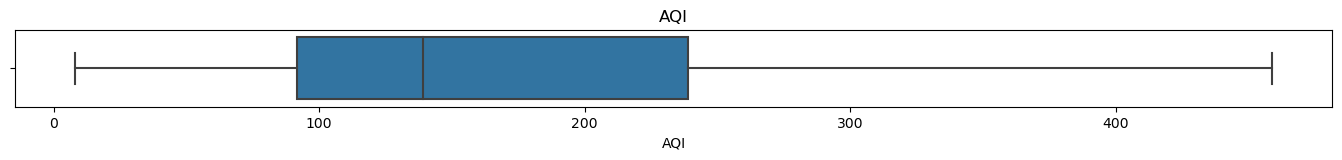

In [227]:
#Printing boxplot for each numerical column present in the data set
for i in num_col:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df_filled, x=i)
    plt.title(i)
plt.show()

In [228]:
df_filled["city"]=df["City"]
cities=list(df_filled["city"].unique())
cities

['Amaravati',
 'Visakhapatnam',
 'Guwahati',
 'Patna',
 'Chandigarh',
 'Delhi',
 'Ahmedabad',
 'Gurugram',
 'Jorapokhar',
 'Bengaluru',
 'Ernakulam',
 'Kochi',
 'Thiruvananthapuram',
 'Mumbai',
 'Shillong',
 'Bhopal',
 'Aizawl',
 'Brajrajnagar',
 'Talcher',
 'Amritsar',
 'Jaipur',
 'Hyderabad',
 'Chennai',
 'Coimbatore',
 'Lucknow',
 'Kolkata']

In [229]:
df_filled.shape
df_filled["city"]=df["City"]

In [230]:
groupedcity_df=df_filled.groupby("city")

In [231]:
amaravati=groupedcity_df.get_group("Amaravati")
amaravati.drop(["Date","city"],axis=1,inplace=True)

In [232]:
amaravati.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,
2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.760000,37.9336,95.299643
2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.240000,37.9336,184.000000
2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,12.657494,37.9336,197.000000
2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,12.657494,37.9336,198.000000
2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.000000,37.9336,188.000000


In [233]:
amaravati.isnull().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [234]:
amaravati.shape

(951, 10)

In [235]:
amaravati

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,
2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.760000,37.9336,95.299643
2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.240000,37.9336,184.000000
2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,12.657494,37.9336,197.000000
2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,12.657494,37.9336,198.000000
2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.000000,37.9336,188.000000
...,...,...,...,...,...,...,...,...,...,...
2020-06-27,14.50,24.43,1.53,6.53,4.72,8.97,0.55,13.750000,33.7600,42.000000
2020-06-28,16.65,28.51,1.43,8.32,5.59,9.77,0.66,10.860000,37.3400,49.000000
2020-06-29,20.96,32.56,1.65,9.55,6.43,14.30,0.66,14.790000,43.2900,56.000000


### implementing VAR Model for Amaravathi Disrict Data

In [236]:
# Augmented Dickey Fuller Test
import statsmodels.api
from statsmodels.graphics.tsaplots import plot_acf

In [237]:
# Stability Test
def stability_test(series):
    result=statsmodels.tsa.stattools.adfuller(series,autolag="AIC")
    
    if result[1]>=0.5:
        print("data is not stationary")
    else:
        print("procede VAR data is Stationary")

In [238]:
for i in num_col:
    print(f"{i}")
    stability_test(amaravati[i])

PM2.5
procede VAR data is Stationary
PM10
procede VAR data is Stationary
NO
procede VAR data is Stationary
NO2
procede VAR data is Stationary
NOx
procede VAR data is Stationary
NH3
procede VAR data is Stationary
CO
procede VAR data is Stationary
SO2
procede VAR data is Stationary
O3
procede VAR data is Stationary
AQI
procede VAR data is Stationary


In [288]:
# train test data split
tests=7
test=amaravati[-tests:]
train=amaravati[tests:]

In [289]:
model=statsmodels.tsa.vector_ar.var_model.VAR(train)

In [290]:
results=model.fit(7)

In [291]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 14, Jul, 2023
Time:                     23:03:21
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    31.6639
Nobs:                     937.000    HQIC:                   29.3934
Log likelihood:          -25700.8    FPE:                1.44236e+12
AIC:                      27.9944    Det(Omega_mle):     6.94805e+11
--------------------------------------------------------------------
Results for equation PM2.5
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            4.437209         2.430668            1.826           0.068
L1.PM2.5         0.818838         0.060838           13.459           0.000
L1.PM10          0.036929         0.033046            1.118           0.264
L1.N

In [292]:
lagged_Values = train.values[-7:]

In [293]:
pred=results.forecast(y=lagged_Values,steps=7)

In [294]:
predicted=pd.DataFrame(pred,columns=num_col)
predicted.index=test.index
predicted

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,
2020-06-25,22.210187,36.588341,3.229159,9.187447,7.940074,9.924929,0.677887,12.272226,31.219002,58.670787
2020-06-26,25.930148,45.820630,2.604062,11.152557,8.428696,10.639923,0.667575,13.025931,32.660376,65.286044
2020-06-27,26.711776,50.224205,2.752366,12.496735,9.972740,10.765316,0.685236,14.427487,35.668874,70.279651
2020-06-28,27.845789,53.160841,3.898298,14.033714,10.753476,10.835298,0.705982,14.258275,36.388341,74.664527
2020-06-29,28.855749,55.558911,4.075014,13.139390,10.093383,11.065831,0.668145,13.894501,36.059764,76.979017
2020-06-30,29.060473,56.434747,3.342776,11.948996,9.639786,11.284614,0.652472,13.554614,37.050559,75.366302
2020-07-01,28.623982,56.064951,3.369502,12.519853,9.710978,11.236872,0.647706,13.876230,36.196557,74.191069


In [295]:
test

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,
2020-06-25,20.74,37.36,1.90,8.44,6.03,14.57,0.62,15.38,39.32,50.0
2020-06-26,10.41,20.55,1.88,7.21,5.37,12.46,0.53,15.86,25.96,37.0
2020-06-27,14.50,24.43,1.53,6.53,4.72,8.97,0.55,13.75,33.76,42.0
2020-06-28,16.65,28.51,1.43,8.32,5.59,9.77,0.66,10.86,37.34,49.0
2020-06-29,20.96,32.56,1.65,9.55,6.43,14.30,0.66,14.79,43.29,56.0
2020-06-30,21.34,35.16,1.74,10.69,7.10,13.38,0.66,14.58,45.32,61.0
2020-07-01,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,54.0


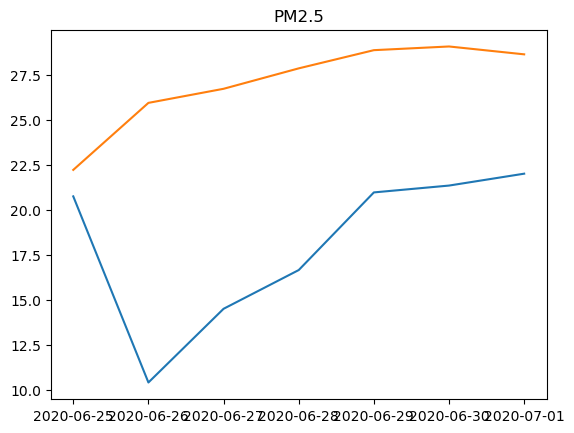

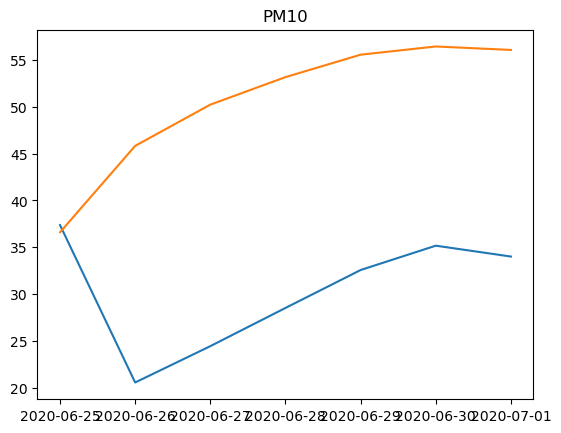

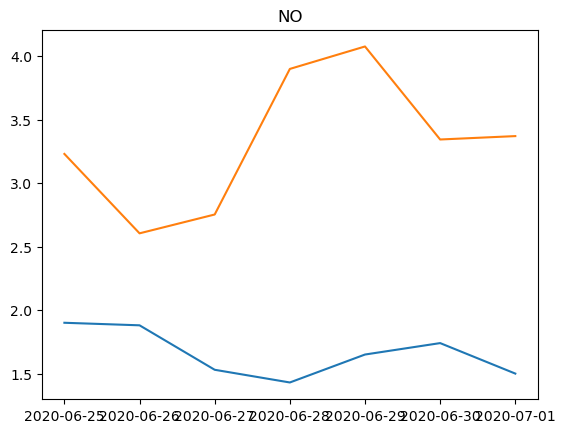

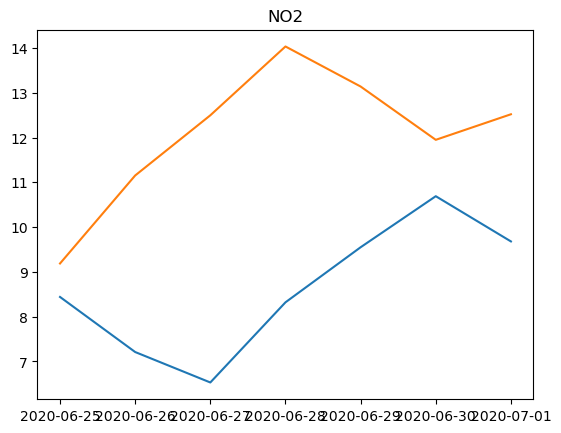

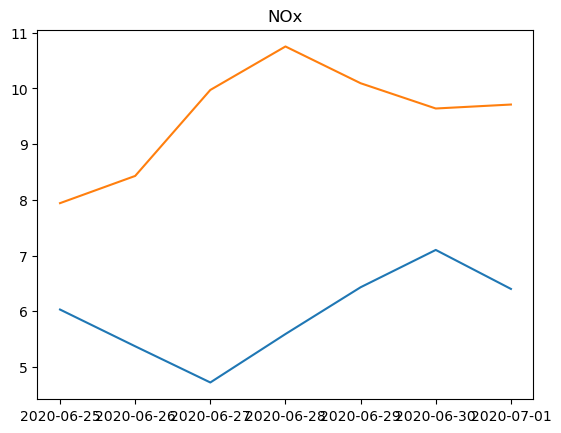

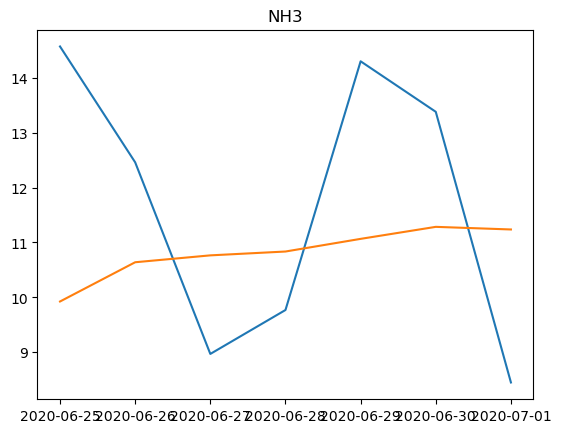

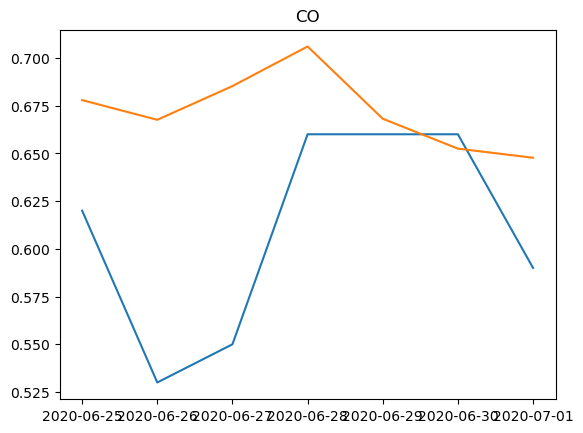

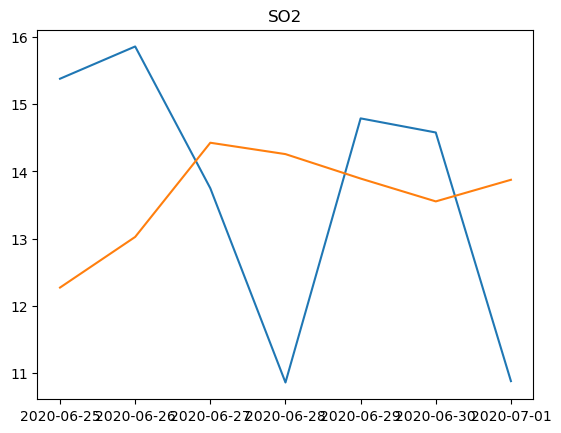

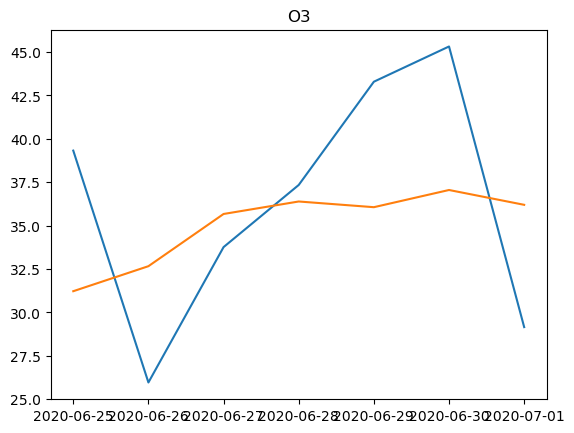

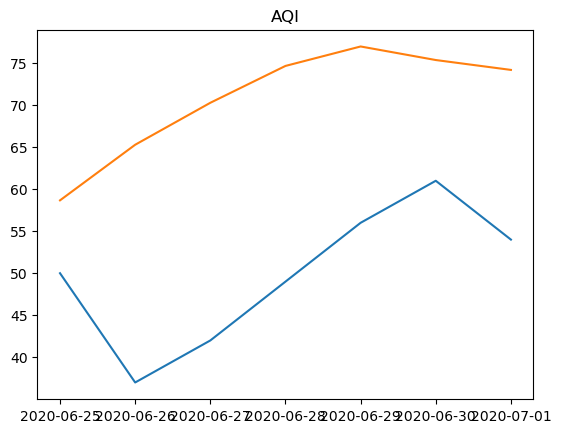

In [296]:
for i in num_col:
    plt.plot(test[i],label=("test",i))
    plt.plot(predicted[i],label=("predicted",i))
    plt.title(i)
    plt.show()

In [297]:
def mape(test,pred):
    m=np.abs((pred-test)/test)*100
    m=m[1].mean()
    return m

In [298]:
num_col

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [299]:
l1=[]
l2=[]
for i in num_col:
    m=mape(predicted[i],test[i])
    l1.append(i)
    l2.append(m)
ovrl_mape=pd.DataFrame({"index":l1,
                        "mape":l2})
ovrl_mape=pd.DataFrame(ovrl_mape)
print(ovrl_mape)
overall_mean=ovrl_mape["mape"].mean()
print(f"\nVAR Model\nOverall average:{overall_mean}")

   index       mape
0  PM2.5  59.853680
1   PM10  55.151206
2     NO  27.805098
3    NO2  35.351149
4    NOx  36.289077
5    NH3  17.106111
6     CO  20.608161
7    SO2  21.757134
8     O3  20.515306
9    AQI  43.326325

VAR Model
Overall average:33.776324839445046


### ARIMA Model

In [187]:
from statsmodels.tsa.arima.model import ARIMA

In [261]:
arima_pred=pd.DataFrame()
for i in num_col:
    model=ARIMA(train[i],order=(1,0,0))
    res=model.fit()
    #print(res.summary())
    
    #Prediction in Dataframe
    arima_pred[i]=res.predict(start="2020-06-25",end="2020-07-01")    

In [262]:
arima_pred

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
2020-06-25,16.547302,39.389625,2.966184,11.602821,8.107383,11.654743,0.598173,13.727623,37.494249,56.886283
2020-06-26,21.980608,41.217192,2.989035,9.666210,7.121243,14.295336,0.621944,14.509726,38.530226,55.114932
2020-06-27,12.402784,26.083493,2.977610,8.558289,6.540125,12.406641,0.550632,14.789883,27.964844,43.601155
2020-06-28,16.194972,29.576578,2.777670,7.945780,5.967811,9.282686,0.566479,13.558362,34.133256,48.029531
2020-06-29,18.188420,33.249718,2.720545,9.558121,6.733831,9.998779,0.653639,11.871586,36.964398,54.229257
2020-06-30,22.184589,36.895850,2.846221,10.666042,7.473436,14.053654,0.653639,14.165367,41.669789,60.428983
2020-07-01,22.536919,39.236577,2.897634,11.692896,8.063359,13.230148,0.653639,14.042799,43.275158,64.857359


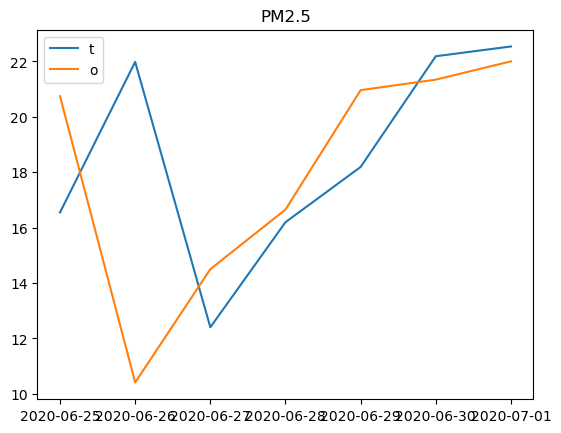

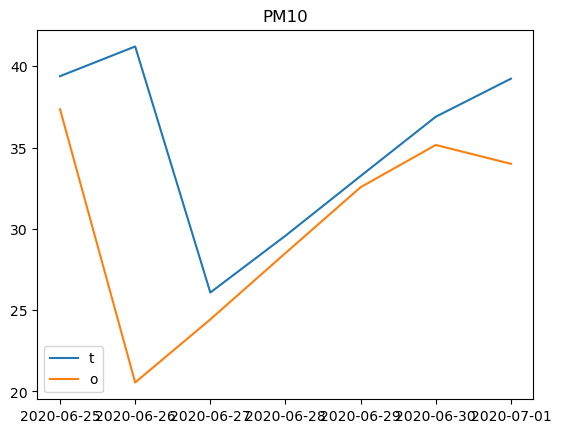

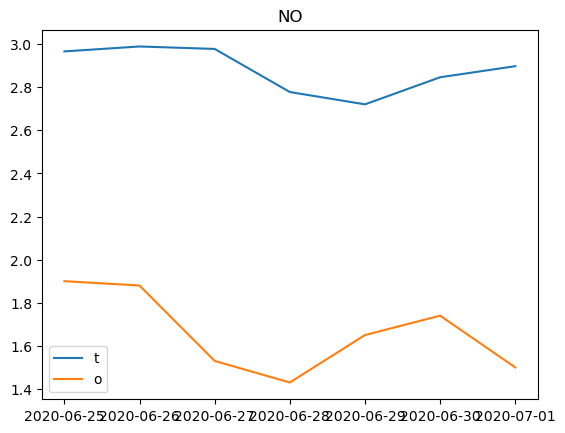

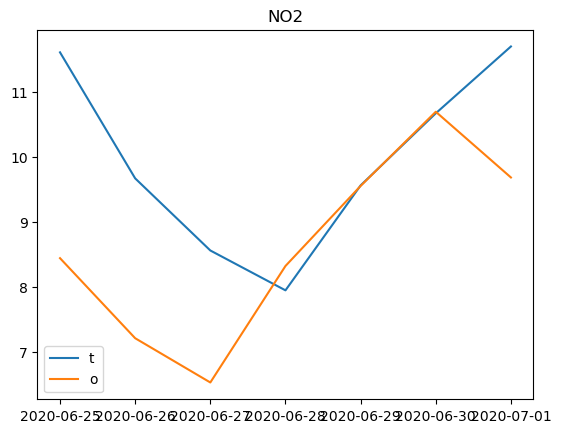

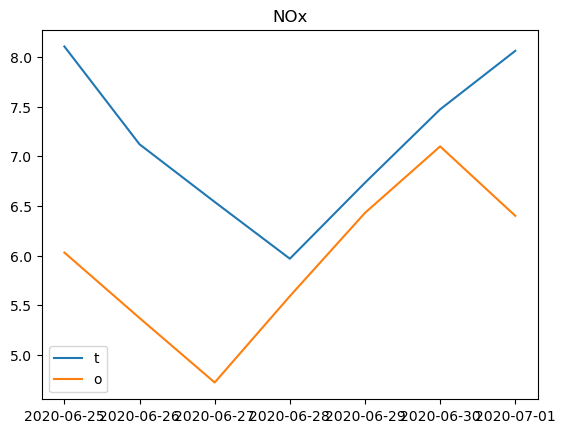

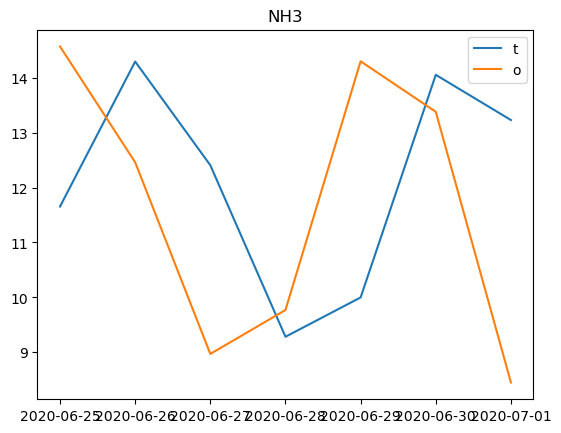

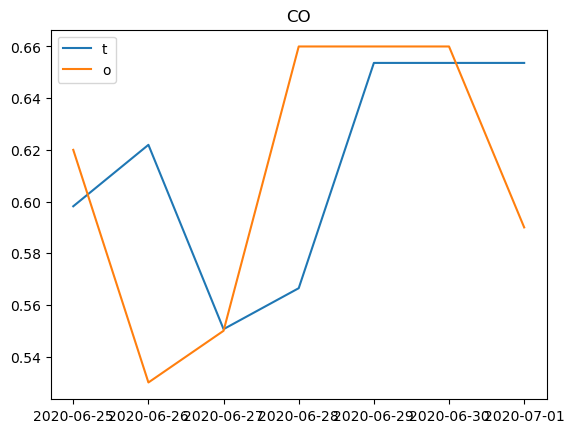

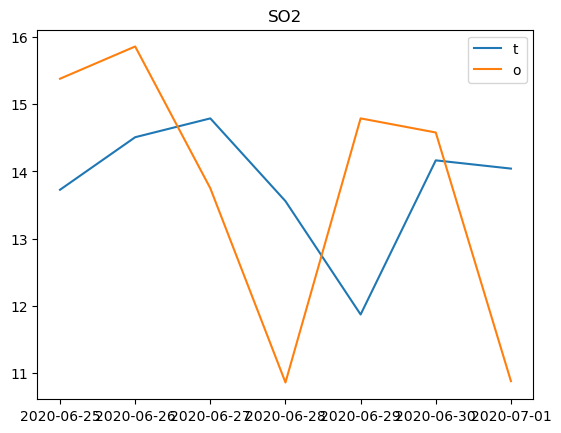

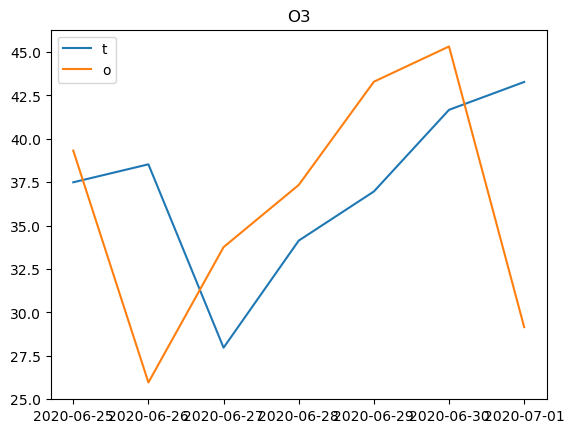

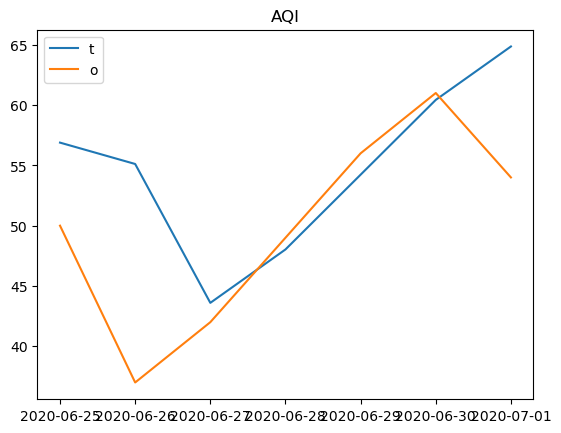

In [266]:
for i in num_col:
    plt.plot(arima_pred[i],label="predicted")
    plt.plot(test[i],label="test")
    plt.title(i)
    plt.legend("topright")
    plt.show()

In [283]:
arima_mape=[]
for i in num_col:
    mape1=np.abs(((arima_pred[i]-test[i])/test[i])*100)
    mape1=mape[0].mean()
    arima_mape.append(mape)
    
arima_mape_df=pd.DataFrame({"index":num_col,
               "arima_mape":arima_mape})

print(arima_mape_df)


   index  arima_mape
0  PM2.5   20.215515
1   PM10    5.432614
2     NO   56.114969
3    NO2   37.474180
4    NOx   34.450799
5    NH3   20.008625
6     CO    3.520417
7    SO2   10.743674
8     O3    4.643314
9    AQI   13.772565


In [281]:
print(f"\nOverall average Mean Average Percentage Error : {arima_mape_df.arima_mape.mean()}\n")


Overall average Mean Average Percentage Error : 20.637667179542575



## Results

In [284]:
print(arima_mape_df)

   index  arima_mape
0  PM2.5   20.215515
1   PM10    5.432614
2     NO   56.114969
3    NO2   37.474180
4    NOx   34.450799
5    NH3   20.008625
6     CO    3.520417
7    SO2   10.743674
8     O3    4.643314
9    AQI   13.772565


In [303]:
print(f"\nARIMA Model\nOverall Mean Average Percentage Error : {arima_mape_df.arima_mape.mean()}\n")


ARIMA Model
Overall Mean Average Percentage Error : 20.637667179542575



In [301]:
print(ovrl_mape)

   index       mape
0  PM2.5  59.853680
1   PM10  55.151206
2     NO  27.805098
3    NO2  35.351149
4    NOx  36.289077
5    NH3  17.106111
6     CO  20.608161
7    SO2  21.757134
8     O3  20.515306
9    AQI  43.326325


In [302]:
print(f"\nVAR Model\nOverall Mean Abs Percentage Error:{overall_mean}")


VAR Model
Overall Mean Abs Percentage Error:33.776324839445046
